## TextBlob Sentiment on Tweets

This notebook requires you to have done 'pip install textblob' at your command line or in your Anaconda package installer.   We will use an already collected spreadsheet of tweets by Trump (thanks to David Robinson).

In [79]:
import numpy as np
from matplotlib import pyplot
import pandas as pd

from textblob import TextBlob


In [18]:
%matplotlib inline

In [4]:
df = pd.read_csv("data/trump_tweets.csv", sep="\t", encoding="latin1")

In [6]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,My economic policy speech will be carried live...,FALSE,9214,NaN,2016-08-08 15:20:44,False,NaN,7.626699e+17,NaN,"<a href=\http://twitter.com/download/android\""...",realDonaldTrump,3107,False,False,NaN,NaN
2,"Join me in Fayetteville, North Carolina tomorr...",FALSE,6981,NaN,2016-08-08 13:28:20,False,NaN,7.626416e+17,NaN,"<a href=\http://twitter.com/download/iphone\"" ...",realDonaldTrump,2390,False,False,NaN,NaN
3,"#ICYMI: \Will Media Apologize to Trump?\"" http...",FALSE,15724,NaN,2016-08-08 00:05:54,False,NaN,7.624397e+17,NaN,"<a href=\http://twitter.com/download/iphone\"" ...",realDonaldTrump,6691,False,False,NaN,NaN
4,"Michael Morell, the lightweight former Acting ...",FALSE,19837,NaN,2016-08-07 23:09:08,False,NaN,7.624254e+17,NaN,"<a href=\http://twitter.com/download/android\""...",realDonaldTrump,6402,False,False,NaN,NaN
5,The media is going crazy. They totally distort...,FALSE,34051,NaN,2016-08-07 21:31:46,False,NaN,7.624009e+17,NaN,"<a href=\http://twitter.com/download/android\""...",realDonaldTrump,11717,False,False,NaN,NaN


## TextBlob's sentiment function returns both polarity (how positive or negative something is) and subjectivity.

Subjectivity means something like how much is the statement just "an opinion."  Objectivity means more factual (like a fact).  The result you get is a tuple - you can just pick one.

In [23]:
TextBlob(df.iloc[0].text).sentiment

Sentiment(polarity=0.2787878787878788, subjectivity=0.39999999999999997)

In [26]:
def get_sent(row):
    # Take a row of the df, apply the sentiment function to the text, just get sentiment, and round it to 4 digits.
    return round(TextBlob(str(row['text'])).sentiment.polarity,3)

In [27]:
df['TBSentiment'] = df.apply(get_sent, axis=1)

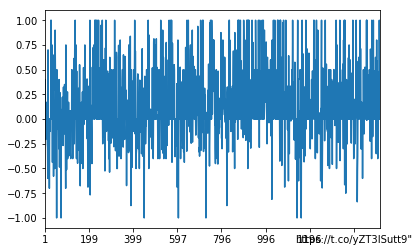

In [34]:
df['TBSentiment'].plot()

### Doing Some Pandas Date Magic -- We can Aggregate by Dates If We Index by a Datetime Value

We have to make the date be the index of the dataframe, which means also making pandas understand it's a datetime value.  I had a long search to get this right, to be honest. 

In [35]:
df.index = df['created']

In [74]:
df.index = pd.to_datetime(df.index, yearfirst=True,errors='coerce')   # figuring this out was horrible by the way

In [94]:
# if this works, then you know your index is a proper datetime type, which can be grouped by date units.

df.index.month

Float64Index([ 8.0,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0,
              ...
              12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0],
             dtype='float64', name='created', length=1519)

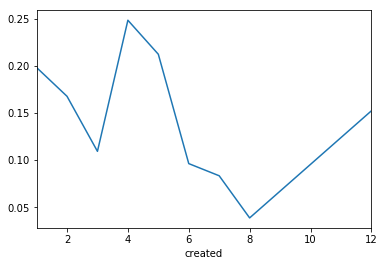

In [95]:
# this is a plot of the mean sentiment by month.

df.groupby(df.index.month).aggregate(np.mean)['TBSentiment'].plot()

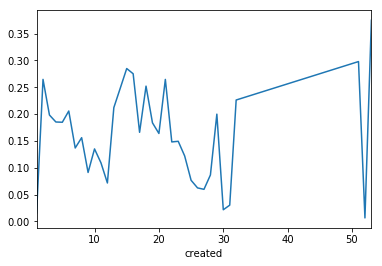

In [101]:
# mean sentiment by week.  It looks like there may be some missing data at the end.

df.groupby(df.index.week).aggregate(np.mean)['TBSentiment'].plot()

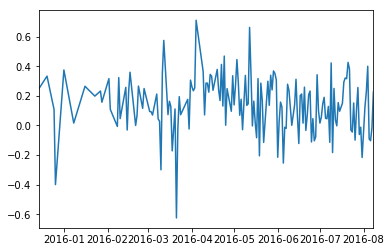

In [100]:
# by full day (date) -- if you use "day" it's the day of the month, which is wrong!
# But the X axis label is showing the month, and inside each month is the value per day of the month.

df.groupby(df.index.date).aggregate(np.mean)['TBSentiment'].plot()